In [1]:
import math
import random
#Benötigte Pakete

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Circle 

import matplotlib.mlab as mlab
import numpy as np
import cmath
from scipy import stats

from numpy import linalg as LA
import scipy
from scipy import spatial
import time
#import tables

import os
#import h5py

from matplotlib import animation
import matplotlib
from scipy.optimize import curve_fit
from matplotlib import rc

import gc
import sys
gc.enable()
import copy

from mpl_toolkits import mplot3d

In [2]:
def distance(x1,y1,x2,y2):
    dx=x1-x2
    dy=y1-y2
    return math.hypot(dx, dy)

def e_func (x,L,a):
    return a*np.exp(-x/L)
coords=[];

### Eingabe

In [3]:
number_atoms=5      # anzahl atome

a = 10                  # fläche für erzeugte atome  a->x achse
b = 10                  # b-> y achse
r_b = 3              # constraint rydberg blockade
plot_pos = False         # brauch man en plot?
t_plot= 1               # time, bei welcher die wahrscheinlichkeit für den position plot ausgerechnet wird
plot_prob = True 
eigenenergy = 0         # stärke der eigenwechselwirkung
coupling_constant= 100  # stärke der nachbarwechselwirkung
t_steps= 1
t_end= 200
def ani(a,b,c,d):
    return
def auswertung(a,b):
    return
def ani2(x):
    return
def eigenstate(x):
    return
def ratios():
    return

In [4]:
def quad_func(t,a):
    return a*t**2

def lin_func(t,a):
    return a*t

def sublin_func(t,a,b):
    return a*t**b

### Erzeugung

In [5]:
def produce_atoms(number_atoms, a, b, r_b):
    A=np.pi*a*a #fläche
   
    
    atoms = [[0,0]]
      
    a_old_r=0
    b_old_o=0
    s=1
    
    for i in range(number_atoms-1):
        j=0
        count =0
        r=a*np.sqrt(random.uniform((b/a)**2,1))
        theta=random.uniform(0,1)*2*np.pi
        x,y=r * np.cos(theta), r * np.sin(theta)
        punkt = np.array([[x,y]]) 
        gesetzt= False
        while (gesetzt==False):
            gesetzt=True
            if ((np.min(scipy.spatial.distance.cdist(atoms, punkt, metric='euclidean')))<(2*r_b)):
                r=a*np.sqrt(random.uniform((b/a)**2,1))
                theta=random.uniform(0,1)*2*np.pi
                x,y=r * np.cos(theta), r * np.sin(theta)
                punkt = np.array([[x,y]]) 
                #count+=1
                gesetzt=False
            
            """if (count>2000):
                print("jo")
                a_old_r=a
                a+=r_b/2
                b+=r_b/2
                count=0"""
        atoms.append([punkt[0][0],punkt[0][1]])
    
        
    return np.round(atoms,4)

    

def plotte_pos(atoms,r_b,t,plot_number):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    to_be_placed=len(atoms)
    
    atoms_x=np.zeros(to_be_placed)
    atoms_y=np.zeros(to_be_placed)

    for i in range(to_be_placed):
        atoms_x[i]=atoms[i][0]                                #---------unötig komplex - noch machen
        atoms_y[i]=atoms[i][1]
        
    """for i in range(number_atoms):
        circle = plt.Circle((atoms[i][0], atoms[i][1]), radius=r_b, fill=False)
        plt.gca().add_patch(circle)
        plt.text(atoms[i][0]+0.01*a, atoms[i][1]+0.01*b, i, color="brown", fontsize=12)
        #plt.text(atoms_x[i]-0.05*a , atoms_y[i]-0.05*b, round(p[i][t],3), color="black", fontsize=12)"""
    
    """for i in range(number_atoms,to_be_placed,1):
        circle = plt.Circle((atoms[i][0], atoms[i][1]), radius=r_b, fill=False,color="orange")
        plt.gca().add_patch(circle)
        plt.text(atoms[i][0]+0.01*a, atoms[i][1]+0.01*b, i, color="brown", fontsize=12)
        #plt.text(atoms_x[i]-0.05*a , atoms_y[i]-0.05*b, round(p[i][t],3), color="black", fontsize=12)"""

    #for i in range(number_atoms):
    #    j=i
    #    while (j<number_atoms):
    #        plt.plot([atoms[i][0], atoms[j][0]], [atoms[i][1], atoms[j][1]], color="orange")
    #        j+=1
    
    plt.scatter(atoms_x, atoms_y, marker='s')
    plt.xlabel('x', size=15)
    plt.ylabel('y', size=15)
    #plt.xlim(-a,2*a)
    #plt.ylim(-b,2*b)
    plt.title('random distribution - zum Zeitpunkt: 1', size=15)
    plt.grid(True)
    #plt.savefig("figures/Mittelung_Anregung/config_%i.png" %plot_number)

### Wahrscheinlichkeitsberechnung

In [6]:
def generate_hamiltonian(atoms,number_atoms):
    #Distance + Hamiltonian-------------------------------------------------------------------------------------
    H = np.zeros((number_atoms,number_atoms),dtype=np.float16)
    global distance_matrix
    distance_matrix = np.zeros((number_atoms,number_atoms),dtype=np.float16)
    global abstand_ursprung
    abstand_ursprung= np.zeros(number_atoms, dtype=np.float16)
    
    #start= time.time()
    distance_matrix= scipy.spatial.distance.cdist(atoms[:number_atoms], atoms[:number_atoms], metric='euclidean')
    abstand_ursprung = copy.copy(distance_matrix[:,angeregt])
    np.fill_diagonal(distance_matrix,1)
    H=np.divide(coupling_constant,np.power(distance_matrix,3))
    np.fill_diagonal(distance_matrix,0)
    np.fill_diagonal(H,eigenenergy)
    
    #for i in range(0,anzahl_eigenenergien-1):
        #H[i][i]= random.uniform(-10**-9, 10**9)
    #H[300][300]= 0
    #H[299][299]= 0
    #H[301][301]= 0
 
    #print("Time for Hamiltonian: ",time.time()-start)
    
    
#Linearisierung---------------------------------------------------------------------------------------------
    #start = time.time()
    global eigenvalues
    eigenvalues=np.zeros(number_atoms,dtype=np.float16)
    global eigenvectors2
    eigenvectors=np.zeros((number_atoms,number_atoms),dtype=np.float16)
    eigenvalues, eigenvectors = LA.eigh(H)
    eigenvectors2=copy.copy(eigenvectors)
    #print("Time for Linearisierung: ",time.time()-start)
    
    
    #print(sys.getsizeof(H))
    H=None
    return eigenvalues, eigenvectors

In [7]:
def ultimate_justeins(eigen_values,eigenvectors,t_steps,t_end,t_start,angeregt):
    
#Koeffizienten----------------------------------------------------------------------------------------------
    #start = time.time()
    total_steps=round((t_end-t_start)/t_steps)
    time_array = np.arange(t_start,t_end,t_steps)[:total_steps]
    global eigenvectors_evo 
    eigenvectors_evo= np.zeros((total_steps,number_atoms,number_atoms),dtype="complex64")
    
    
    i=0
    for t in time_array:
        eigenvectors_evo[i]=eigenvectors*np.exp(-1j*eigenvalues*t)
        i+=1
    #print("Time for Probability_Coeffizienten: ",time.time()-start)


#Zeitenwicklung--------------------------------------------------------------------------------------------
    #start = time.time()
    eigenvectors=eigenvectors[angeregt][:,None]
    psi_t= np.zeros((total_steps,number_atoms,1),dtype="complex64")
    for i in range(total_steps):
        psi_t[i]=np.dot(eigenvectors_evo[i],eigenvectors)  
    
    #print("Time for Probability_Zeitentwicklung: ",time.time()-start)
    
    eigenvectors=None
    
    
#Wahrscheinlichkeiten---------------------------------------------------------------------------------------
    #start = time.time()
    np.square(np.absolute(psi_t,out=psi_t),out=psi_t)    # now psi_all_t = probability
    #print("Time for Probability_wahrscheinlichkeit: ",time.time()-start)

#Mittlerer Abstand------------------------------------------------------------------------------------------
    #start = time.time()
    probability=np.real(psi_t)
    #probability[probability < 10**-15] = 0
    psi_t = None
    gc.collect()
  

    return probability

In [8]:
def Berechnung(eigenvalues,eigenvectors,number_atoms,t_start,t_end,t_steps):  
    
    
    probability = np.zeros((1,number_atoms,1))
    
    #2500000000
    #100000000
    anzahl_steps_möglich =  math.floor(2000000000/(number_atoms*number_atoms))
    global runden
    ang_anzahl_steps=round((t_end-t_start)/t_steps)
    runden = math.floor((ang_anzahl_steps-1)/anzahl_steps_möglich)
    #print("Von ",t_start,"s bis",t_end,"s mit", ang_anzahl_steps," steps")
    #print("Maximal mögliche Anzahl an Steps auf einmal:",anzahl_steps_möglich )
    #print("Anzahl Wiederholungen:",runden)
    
    
    
    #np.save
    #f_probability = open("files/probability.npy","wb")
    
    
    """#HD5f
    path = 'files/prob.hdf5'
    os.remove(path)
    f= h5py.File(path, "a")
    dset = f.create_dataset('jo', (ang_anzahl_steps,number_atoms,number_atoms),maxshape=(None,None,None), 
                            dtype="float16",chunks=(1,number_atoms,number_atoms))       
    #dset.resize(dset.shape[0]+1, axis=0) 
    """
      
    
    #Für große Daten >28Gb nimm HD5f
    #Für alles kleiner, d.h. unter 100000s nimm np.save
    

    i=0
    for i in range(runden):
        t_start_tmp=round(i*anzahl_steps_möglich*t_steps+t_start,12)
        t_end_tmp=round(t_start_tmp+anzahl_steps_möglich*t_steps,12)
        #print("start:",t_start_tmp)
        #print("ende:",t_end_tmp)

        prob_tmp = ultimate_justeins(eigenvalues,eigenvectors,t_steps,t_end_tmp,t_start_tmp,angeregt)
        
        #np.save(f_probability,prob_tmp)
        #dset[a:b] = prob_tmp
        probability=np.append(probability,prob_tmp,axis=0)
        
        #r_mean=np.append(r_mean,np.mean(r_tmp,axis=1))
        
       

    t_start_tmp=round(runden*anzahl_steps_möglich*t_steps+t_start,12)
    t_end_tmp=t_end
    
    if (t_start_tmp < t_end_tmp):
        #print("start:",t_start_tmp)
        #print("ende:",t_end_tmp)
   
        #start=time.time()
        prob_tmp= ultimate_justeins(eigenvalues,eigenvectors,t_steps,t_end_tmp,t_start_tmp,angeregt)
        
        
        #print("Berechnung:", np.round(time.time()-start,3))
        #np.save(f_probability,prob_tmp)
        #dset[a:b] = prob_tmp
        probability=np.append(probability,prob_tmp,axis=0)
       
        #r_mean=np.append(r_mean,np.mean(r_tmp,axis=1))
       

    probability=np.delete(probability,0,axis=0)

    
    #r_mean=np.delete(r_mean,0,axis=0)
    
    
    #Berechnung des Schwerpunkts/Erwartung -----------------------------------------------------------------------
    

                              
    return probability

In [10]:
def auswertung(probability):
     
    #mean displacement -------------------------------------------------------------------------------------
    r_2=np.dot(np.transpose(probability, axes=(0,2,1)),np.power(abstand_ursprung,2)[:,None])[:,0][:,0]
    r_1=np.dot(np.transpose(probability, axes=(0,2,1)),abstand_ursprung[:,None])[:,0][:,0]
    #print("Time for r_mean: ",time.time()-start)
    


    #standard deviation -----------------------------------------------------------------------------------
    deviation=np.subtract(r_2,np.square(r_1))
    
    #infinity_time-------------------------------------------------------------------------------------
    p_infinity=np.dot(np.square(eigenvectors2[0]),np.square(eigenvectors2.transpose()))

    
    #accumulation -----------------------------------------------------------------------------------------

    n_ursprung=[[],[], [],[]] #arr = [[] for _ in range(5)]
    #n_schwerpunkt=[]
  
    
    p1=probability[0][:,0]
    p2=probability[20][:,0]
    p3=probability[50][:,0]
    p4=probability[150][:,0]
    

    n_ursprung_inf=[]
    for i in range(0,r_ende):
        n_ursprung[0].append(np.sum(p1[(i<=abstand_ursprung)& (abstand_ursprung<=r_ende)]))
        n_ursprung[1].append(np.sum(p2[(i<=abstand_ursprung)& (abstand_ursprung<=r_ende)]))
        n_ursprung[2].append(np.sum(p3[(i<=abstand_ursprung)& (abstand_ursprung<=r_ende)]))
        n_ursprung[3].append(np.sum(p4[(i<=abstand_ursprung)& (abstand_ursprung<=r_ende)]))
        #n_schwerpunkt.append(np.sum(p4[(i<=norm_schwerpunkt[50])& (norm_schwerpunkt[50]<=r_ende)]))
        
        n_ursprung_inf.append(np.sum(p_infinity[(i<=abstand_ursprung)& (abstand_ursprung<=r_ende)]))

    n_intervall_inf=[]
    n_intervall = [[],[],[],[]]
    
    #dr=20
    #for i in range(0,r_ende-dr):
        #flaeche= np.pi*((i+dr)**2-i**2)
        #n_intervall[0].append((np.sum(p1[(i<=abstand_ursprung)& (abstand_ursprung<i+dr)]))/(flaeche))
        #n_intervall[1].append((np.sum(p2[(i<=abstand_ursprung)& (abstand_ursprung<i+dr)]))/(flaeche))
        #n_intervall[2].append((np.sum(p3[(i<=abstand_ursprung)& (abstand_ursprung<i+dr)]))/(flaeche))
        #n_intervall[3].append((np.sum(p4[(i<=abstand_ursprung)& (abstand_ursprung<i+dr)]))/(flaeche))
        #n_intervall_inf.append((np.sum(p_infinity[(i<=abstand_ursprung)& (abstand_ursprung<i+dr)]))/(flaeche))
            
            
    #densitiy-------------------------------------------------------------------------------------------
        
    density_inf=[]
    density=[[],[], [],[]]
    d_r=12
    for klein in np.arange(0,radius,d_r):
        index = np.argwhere((klein<=abstand_ursprung)& (abstand_ursprung<klein+d_r))
        laenge= len(index)
        if laenge==0:
            density_inf.append(0)
            density[0].append(0)
            density[1].append(0)
            density[2].append(0)
            density[3].append(0)
        else:
            density_inf.append(np.sum(p_infinity[index])/laenge)
            density[0].append((np.sum(p1[index])/laenge))
            density[1].append((np.sum(p2[index])/laenge))
            density[2].append((np.sum(p3[index])/laenge))
            density[3].append((np.sum(p4[index])/laenge))
    
       
    #invers participation ratio --------------------------------------------------------------------------
    ipr = []
    for i in range(len(probability)):
        ipr.append(1/(np.sum(probability[i][:,0]**2)))
    
    
   
    p_infinity_g=np.dot(np.power(eigenvectors[0],4),np.power(eigenvectors.transpose(),4))

    ipr_inf = 1/(np.sum(2*p_infinity**2-p_infinity_g))

    
   
     #alles infinity time ------------------------------------------------------------------------------

    
    r_2_inf=np.dot(p_infinity,np.power(abstand_ursprung,2)[:,None])
    r_1_inf=np.dot(p_infinity,abstand_ursprung[:,None])
    deviation_inf=np.subtract(r_2_inf,np.square(r_1_inf))
    
    
    innen=0
    distribution_width_inf=0
    tmp=copy.copy(abstand_ursprung)
    while innen<0.9:
        minimum= np.argmin(tmp)
        distribution_width_inf= abstand_ursprung[minimum]
        innen+= p_infinity[minimum]     #
        tmp[minimum]=math.inf 
     
    
    
    
    
    #distribution_width---------------------------------------------------------------------------------
    
    inhalt=0
    distribution_width=[]
    
    for i in range(0,len(probability)):
        tmp=copy.copy(abstand_ursprung)
        inhalt=0
        while inhalt<0.9:
            minimum= np.argmin(tmp)
            kk= abstand_ursprung[minimum]
            inhalt+= probability[i][minimum][0]
            tmp[minimum]=math.inf
        distribution_width.append(kk)
    
    

        
        


    
    #daten-----------------------------------------------------------------------------------------------
    
    #data = open("files/data_loc5_%i.npy"%number_atoms,"wb")
    #np.save(data,n_schwerpunkt)
    #np.save(data,n_ursprung)
    #np.save(data,d_schwerpunkt_norm)
    #np.save(data,d_ursprung_norm)
    #np.save(data,erwartung_ursprung_norm)
    #np.save(data,distribution_width)
    #np.save(data,n_schwerpunkt_inf)
    #np.save(data,n_ursprung_inf)
    #np.save(data,distribution_width_inf)
    #np.save(data,deviation)
    #np.save(data,deviation_inf)
    #np.save(data,n_ursprung_inf)
    #np.save(data,erwartung_ursprung_norm_inf)
    


    return np.array(density),np.array(r_1), np.array(r_2),np.array(density_inf),np.array(ipr), ipr_inf, np.array(n_ursprung), np.array(n_ursprung_inf), np.array(deviation), np.array(distribution_width), distribution_width_inf, deviation_inf, r_1_inf,r_2_inf

In [11]:
def eigenstate():
    
    #eigenstates----------------------------------------------------------------------------------------
    #p_eigenstate =  np.square(np.absolute(eigenvectors2[:,eigenstate]))
    p_eigenstates = np.square(np.absolute(eigenvectors2))
    
    #p_eigenstate[p_eigenstate < 10**-10] = 0

    #a=p_eigenstates                 
    
    #schwerpunkt------------------------------------------------------------------------------------------
    
    #schwerpunkt= np.dot(p_eigenstate,atoms_array) 
    #schwerpunkte= np.dot(p_eigenstates.transpose(),atoms_array)
      

    #distanz= scipy.spatial.distance.cdist([schwerpunkt],atoms_array, metric='euclidean')[0]
    #distanzen= np.zeros([number_atoms,number_atoms])
    #for i in range(number_atoms):
        #distanzen[i] = scipy.spatial.distance.cdist( [schwerpunkte[i]],atoms_array, metric='euclidean')[0]
    
    
    #berechnung ---------------------------------------------------------------------------------------
   
    #n_eigenstate=[]
    #correlation=[]
    #for i in range(r_anfang,r_ende):
       #n_eigenstate.append(np.sum(p_eigenstate[(i<distanz)& (distanz<r_ende)]))
        #indices=np.where((distance_matrix!=0) & (i<distance_matrix)& (distance_matrix<r_ende))
        #correlation.append(np.sum(p_eigenstate[indices[0]]*p_eigenstate[indices[1]]))

        
    #inverse participation ratio -------------------------------------------------------------------------
    ipr_2=[]
    for i in range(number_atoms):    
        ipr_2.append(1/np.sum(p_eigenstates[:,i]**2)) 
        
        
        
    # ratio -----------------------------------------------------------------------------------------------  
    ratio = np.zeros([number_atoms])
    for n in range(1,number_atoms-1):
        delta_n = eigenvalues[n+1]-eigenvalues[n]
        delta_n_1 = eigenvalues[n]-eigenvalues[n-1]
        ratio[n] = np.min([delta_n,delta_n_1])/np.max([delta_n,delta_n_1])
        
    ratio = ratio[1:-1]
    
        
    """k=0
    l=0
    ipr_all = np.zeros([4,18])
    interessant = [0,100, 500, 998]
    for j in interessant:
        k=0
        for i in np.arange(1,10,0.5):
            ipr_all[l][k]= (1/np.sum(p_eigenstates[:,j]**i))
            k+=1
        l+=1"""
  
    #ipr_all = np.zeros([4,18])
    
    return np.array(ipr_2), np.array(ratio) #, np.array(n_eigenstate) , np.array(correlation), np.array(ipr_2)#, np.array(ipr_all)

In [6]:
kkk=np.array([3200,5000,7200])
r_b=5
radius_5000 = (np.sqrt(kkk*r_b**2/0.1))
print(radius_5000)

[ 894.427191   1118.03398875 1341.6407865 ]


## MEAN

#### Mittelung über Startanregungen

In [13]:
eigenenergy = 0    
coupling_constant= 3*10**9  
anzahl_eigenenergien= 0

global angeregt
angeregt=0

global number_atoms
global radius
number_atoms=3200
r_b = 5  


a = (np.sqrt(number_atoms*r_b**2/0.5))
#a = 500
radius = a 
speicher_atome=0
b =  0         
           

#ich muss testen, wie viele files für wahrscheinlichkeiten es gibt, weil davon gibt es weniger
folder_p= "files/over_time/probs/radius_"+str(int(radius))+"/p_"+str(number_atoms)+"_"+str(int(radius))
folder_a= "files/atoms/radius_"+str(int(radius))+"/atoms_"+str(number_atoms)+"_"+str(int(radius))
folder_data= "files/over_time/datas/radius_"+str(int(radius))

if not os.path.exists(folder_p): #"/home/jp/Dokumente/Bachelorarbeit/programs/"
    os.makedirs(folder_p)  #"/home/jp/Dokumente/Bachelorarbeit/programs/"+folder_p)
    print(folder_p +" erstellt")

if not os.path.exists(folder_a):
    os.makedirs(folder_a)
    print(folder_a +" erstellt")
    
if not os.path.exists(folder_data):
    os.makedirs(folder_data)
    print(folder_data +" erstellt")

path, dirs, files = next(os.walk(folder_p))
speicher_p = len(files)

path, dirs, files = next(os.walk(folder_a))
speicher_atome = len(files)


print("# files in atom Ordner:",speicher_atome)
print("# files in prob Ordner:",speicher_p)

number_calculations = 200

# files in atom Ordner: 200
# files in prob Ordner: 50


In [14]:
global r_anfang, r_ende
r_anfang=0
r_ende=int(radius)


global save_nr
save_nr = 0


start=time.time()
print("iteration: 0")
if save_nr<speicher_atome:
    atoms = open(folder_a+"/atoms"+str(number_atoms)+"_"+str(int(radius))+"_"+str(save_nr)+".npy","rb")
    atoms_array= np.load(atoms)
    atoms.close()
    eigenvalues, eigenvectors = generate_hamiltonian(atoms_array,number_atoms)
    
    if save_nr<speicher_p:
        
        f_probability = open(folder_p+"/p"+str(number_atoms)+"_"+str(int(radius))+"_"+str(save_nr)+".npy","rb")
        prob = np.load(f_probability)
        f_probability.close()
    else:
        prob_1=Berechnung(eigenvalues,eigenvectors,number_atoms,0,10**-7,10**-8)
        prob_2=Berechnung(eigenvalues,eigenvectors,number_atoms,10**-7,10**-5,10**-7)
        prob_3=Berechnung(eigenvalues,eigenvectors,number_atoms,10**-5,10**-4,10**-6)
        prob_4=Berechnung(eigenvalues,eigenvectors,number_atoms,10**-4,10**-3,10**-5)

        prob = np.concatenate((prob_1,prob_2,prob_3,prob_4), axis=0)
        f_probability = open(folder_p+"/p"+str(number_atoms)+"_"+str(int(radius))+"_"+str(save_nr)+".npy","wb")
        np.save(f_probability,prob)
        f_probability.close()
    
else:
    
    atoms = open(folder_a+"/atoms"+str(number_atoms)+"_"+str(int(radius))+"_"+str(save_nr)+".npy","wb")
    atoms_array = produce_atoms(number_atoms, a, 0, r_b)
    np.save(atoms,atoms_array)
    atoms.close()
    
    eigenvalues, eigenvectors = generate_hamiltonian(atoms_array,number_atoms)
    prob_1=Berechnung(eigenvalues,eigenvectors,number_atoms,0,10**-7,10**-8)
    prob_2=Berechnung(eigenvalues,eigenvectors,number_atoms,10**-7,10**-5,10**-7)
    prob_3=Berechnung(eigenvalues,eigenvectors,number_atoms,10**-5,10**-4,10**-6)
    prob_4=Berechnung(eigenvalues,eigenvectors,number_atoms,10**-4,10**-3,10**-5)

    prob = np.concatenate((prob_1,prob_2,prob_3,prob_4), axis=0)
    f_probability = open(folder_p+"/p"+str(number_atoms)+"_"+str(int(radius))+"_"+str(save_nr)+".npy","wb")
    np.save(f_probability,prob)
    f_probability.close()


density, r_1,r_2, density_inf, ipr,ipr_inf, n_ursprung, n_ursprung_inf, deviation, distribution_width, distribution_width_inf, deviation_inf,r_1_inf,r_2_inf = auswertung(prob)

density_inf_S               = 0     
density_S                   = 0  
ipr_S                       = 0
ipr_inf_S                   = 0  
n_ursprung_S                = 0     
n_ursprung_inf_S            = 0         
deviation_S                 = 0    
distribution_width_S        = 0             
distribution_width_inf_S    = 0                 
deviation_inf_S             = 0         
r_1_inf_S                   = 0   
r_2_inf_S                   = 0  
r_1_S                       = 0
r_2_S                       = 0

save_nr+=1


for i in range(0,number_calculations-1):
    print("Iteration:", i+1)
    if save_nr<speicher_atome:
        atoms = open(folder_a+"/atoms"+str(number_atoms)+"_"+str(int(radius))+"_"+str(save_nr)+".npy","rb")
        atoms_array= np.load(atoms)
        atoms.close()
        eigenvalues, eigenvectors = generate_hamiltonian(atoms_array,number_atoms)
        
        if save_nr<speicher_p:
            f_probability = open(folder_p+"/p"+str(number_atoms)+"_"+str(int(radius))+"_"+str(save_nr)+".npy","rb")
            prob = np.load(f_probability)
            f_probability.close()
        else:
            prob_1=Berechnung(eigenvalues,eigenvectors,number_atoms,0,10**-7,10**-8)
            prob_2=Berechnung(eigenvalues,eigenvectors,number_atoms,10**-7,10**-5,10**-7)
            prob_3=Berechnung(eigenvalues,eigenvectors,number_atoms,10**-5,10**-4,10**-6)
            prob_4=Berechnung(eigenvalues,eigenvectors,number_atoms,10**-4,10**-3,10**-5)

            prob = np.concatenate((prob_1,prob_2,prob_3,prob_4), axis=0)
            f_probability = open(folder_p+"/p"+str(number_atoms)+"_"+str(int(radius))+"_"+str(save_nr)+".npy","wb")
            np.save(f_probability,prob)
            f_probability.close()
            
    else:
        atoms_array = produce_atoms(number_atoms, a, 0, r_b)
        atoms = open(folder_a+"/atoms"+str(number_atoms)+"_"+str(int(radius))+"_"+str(save_nr)+".npy","wb")
        np.save(atoms,atoms_array)
        atoms.close()

        eigenvalues, eigenvectors = generate_hamiltonian(atoms_array,number_atoms)
        prob_1=Berechnung(eigenvalues,eigenvectors,number_atoms,0,10**-7,10**-8)
        prob_2=Berechnung(eigenvalues,eigenvectors,number_atoms,10**-7,10**-5,10**-7)
        prob_3=Berechnung(eigenvalues,eigenvectors,number_atoms,10**-5,10**-4,10**-6)
        prob_4=Berechnung(eigenvalues,eigenvectors,number_atoms,10**-4,10**-3,10**-5)

        prob = np.concatenate((prob_1,prob_2,prob_3,prob_4), axis=0)
        f_probability = open(folder_p+"/p"+str(number_atoms)+"_"+str(int(radius))+"_"+str(save_nr)+".npy","wb")
        np.save(f_probability,prob)
        f_probability.close()
    
    
    density_tmp, r_1_tmp,r_2_tmp,density_inf_tmp,ipr_tmp,ipr_inf_tmp, n_ursprung_tmp, n_ursprung_inf_tmp, deviation_tmp, distribution_width_tmp, distribution_width_inf_tmp, deviation_inf_tmp,r_1_inf_tmp,r_2_inf_tmp = auswertung(prob)
    #ipr_2_tmp, ratio_tmp = eigenstate()
   
    density_inf_prev              = density_inf
    density_prev                  = density
    ipr_prev                      = ipr
    ipr_inf_prev                  = ipr_inf
    n_ursprung_prev               = n_ursprung
    n_ursprung_inf_prev           = n_ursprung_inf
    deviation_prev                = deviation
    distribution_width_prev       = distribution_width
    distribution_width_inf_prev   = distribution_width_inf
    deviation_inf_prev            = deviation_inf
    r_1_inf_prev                  = r_1_inf
    r_2_inf_prev                  = r_2_inf
    r_1_prev                      = r_1
    r_2_prev                      = r_2
    
    density_inf                      = (density_inf*(i+1)+density_inf_tmp)/(i+2)
    density                          = (density*(i+1)+density_tmp)/(i+2)
    ipr                              = (ipr*(i+1)+ipr_tmp)/(i+2)
    ipr_inf                          = (ipr_inf*(i+1)+ipr_inf_tmp)/(i+2)
    n_ursprung                       = (n_ursprung*(i+1)+n_ursprung_tmp)/(i+2)
    n_ursprung_inf                   = (n_ursprung_inf*(i+1)+n_ursprung_inf_tmp)/(i+2)
   
    deviation                        = (deviation*(i+1)+deviation_tmp)/(i+2)
    distribution_width               = (distribution_width*(i+1)+distribution_width_tmp)/(i+2)
    distribution_width_inf           = (distribution_width_inf*(i+1)+distribution_width_inf_tmp)/(i+2)
    deviation_inf                    = (deviation_inf*(i+1)+deviation_inf_tmp)/(i+2)
    r_1_inf                          = (r_1_inf*(i+1)+r_1_inf_tmp)/(i+2)
    r_2_inf                          = (r_2_inf*(i+1)+r_2_inf_tmp)/(i+2)
    r_1                              = (r_1*(i+1)+r_1_tmp)/(i+2)
    r_2                              = (r_2*(i+1)+r_2_tmp)/(i+2)
    
    density_inf_S              += (density_inf_tmp-density_inf)*(density_inf_tmp-density_inf_prev)
    density_S                  += (density_tmp-density)*(density_tmp-density_prev)
    ipr_S                      += (ipr_tmp-ipr)*(ipr_tmp-ipr_prev)
    ipr_inf_S                  += (ipr_inf_tmp-ipr_inf)*(ipr_inf_tmp-ipr_inf_prev)
    n_ursprung_S               += (n_ursprung_tmp- n_ursprung)*( n_ursprung_tmp- n_ursprung_prev)
    n_ursprung_inf_S           += (n_ursprung_inf_tmp-n_ursprung_inf)*(n_ursprung_inf_tmp-n_ursprung_inf_prev)
    deviation_S                += (deviation_tmp-deviation)*(deviation_tmp-deviation_prev)
    distribution_width_S       += (distribution_width_tmp-distribution_width)*(distribution_width_tmp-distribution_width_prev)
    distribution_width_inf_S   += (distribution_width_inf_tmp-distribution_width_inf)*(distribution_width_inf_tmp-distribution_width_inf_prev)
    deviation_inf_S            += (deviation_inf_tmp-deviation_inf)*(deviation_inf_tmp-deviation_inf_prev)
    r_1_inf_S                  += (r_1_inf_tmp-r_1_inf)*(r_1_inf_tmp-r_1_inf_prev)
    r_2_inf_S                  += (r_2_inf_tmp-r_2_inf)*(r_2_inf_tmp-r_2_inf_prev)
    r_1_S                      += (r_1_tmp-r_1)*(r_1_tmp-r_1_prev)
    r_2_S                      += (r_2_tmp- r_2)*( r_2_tmp- r_2_prev)
    
    #ratio_all                       =  np.concatenate((ratio_all,ratio_tmp))
    #eigenvalues_all                 =  np.concatenate((eigenvalues_all,eigenvalues))
    #ipr_2_all                       =  np.concatenate((ipr_2_all,ipr_2_tmp))
    
    #ratio                           = (ratio*(i+1)+ratio_tmp)/(i+2)
    #ipr_2                           = (ipr_2*(i+1)+ipr_2_tmp)/(i+2)
    #eig_values                       = (eig_values*(i+1)+eigenvalues)/(i+2)
    
    #n_eigenstate                     = (n_eigenstate*(i+1)+n_eigenstate_tmp)/(i+2)
    #correlation                      = (correlation*(i+1)+correlation_tmp)/(i+2)
    
    
    save_nr +=1

    
density_inf_S             =  np.sqrt(density_inf_S/number_calculations)
density_S                 =  np.sqrt(density_S/number_calculations)
ipr_S                     =  np.sqrt(ipr_S/number_calculations)
ipr_inf_S                 =  np.sqrt(ipr_inf_S /number_calculations)
n_ursprung_S              =  np.sqrt(n_ursprung_S/number_calculations)
n_ursprung_inf_S          =  np.sqrt(n_ursprung_inf_S/number_calculations)
deviation_S               =  np.sqrt(deviation_S/number_calculations)
distribution_width_S      =  np.sqrt(distribution_width_S/number_calculations)
distribution_width_inf_S  =  np.sqrt(distribution_width_inf_S/number_calculations)
deviation_inf_S           =  np.sqrt(deviation_inf_S/number_calculations)
r_1_inf_S                 =  np.sqrt(r_1_inf_S/number_calculations)
r_2_inf_S                 =  np.sqrt(r_2_inf_S/number_calculations)
r_1_S                     =  np.sqrt(r_1_S/number_calculations)
r_2_S                     =  np.sqrt(r_2_S/number_calculations)    

data = open(folder_data+"/data"+str(number_atoms)+"_"+str(int(radius))+".npy","wb")
np.save(data,density_inf)
np.save(data,density)
np.save(data,ipr)
np.save(data,ipr_inf)
np.save(data,n_ursprung)
np.save(data,n_ursprung_inf)
np.save(data,deviation)
np.save(data,distribution_width)
np.save(data,distribution_width_inf)
np.save(data,deviation_inf)
np.save(data,r_1_inf)
np.save(data,r_2_inf)
np.save(data,r_1)
np.save(data,r_2)


np.save(data,density_inf_S)
np.save(data,density_S)
np.save(data,ipr_S)
np.save(data,ipr_inf_S)
np.save(data,n_ursprung_S)
np.save(data,n_ursprung_inf_S)
np.save(data,deviation_S)
np.save(data,distribution_width_S)
np.save(data,distribution_width_inf_S)
np.save(data,deviation_inf_S)
np.save(data,r_1_inf_S)
np.save(data,r_2_inf_S)
np.save(data,r_1_S)
np.save(data,r_2_S)

data.close()

#np.save(data,ratio)
#np.save(data,ratio_all )
#np.save(data,eigenvalues_all)
#np.save(data,ipr_2)

print(time.time()-start)

iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
It

In [29]:
t_steps= 10**-8
t_start=0
t_end= t_start+10**-3


t1=np.arange(0,10**-7,10**-8)[:10]
t2=np.arange(10**-7,10**-5,10**-7)[:99]
t3=np.arange(10**-5,10**-4,10**-6)[:90]
t4=np.arange(10**-4,10**-3,10**-5)[:90]

global times
times=np.concatenate((t1,t2,t3,t4),axis=0)


### Der r_2 Plot

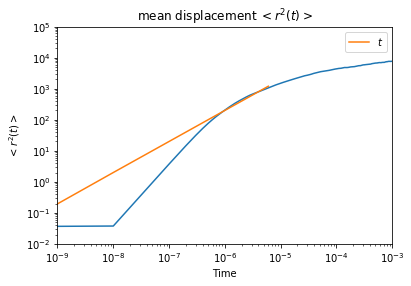

In [34]:
#popt1,pcov1 = curve_fit(quad_func,times[0:70],r_2[0:13],p0=[5*10**14])
popt2,pcov2 = curve_fit(lin_func,times[0:70],r_2[0:70],p0=[1*10**11])
#popt3,pcov3 = curve_fit(sublin_func,times[210:600],r_2[210:600],p0=[5*10**9,0.7])

plt.xscale("log")
plt.yscale("log")
plt.ylim(0.01,10**5)
plt.xlim(10**-9,10**-3)
plt.plot(times,r_2)
plt.title("mean displacement " +r"$<r^2(t)>$")
plt.xlabel("Time")
plt.ylabel(r"$<r^2(t)>$")
#plt.plot(times[0:30],quad_func(times[0:30],*popt1), label=r"$t^2$");
plt.plot(times[0:70],lin_func(times[0:70],2*10**8),label=r"$t$");
#plt.plot(times[210:600],sublin_func(times[210:600],*popt3),label=(r"$t^\gamma$ mit $\gamma =$"+str(round(popt3[1],2))));
plt.legend();

#plt.savefig("files/over_time/figures/r2_"+str(number_atoms)+"_"+str(int(radius))+".png")

0.24369377034147682 14.35608673827779


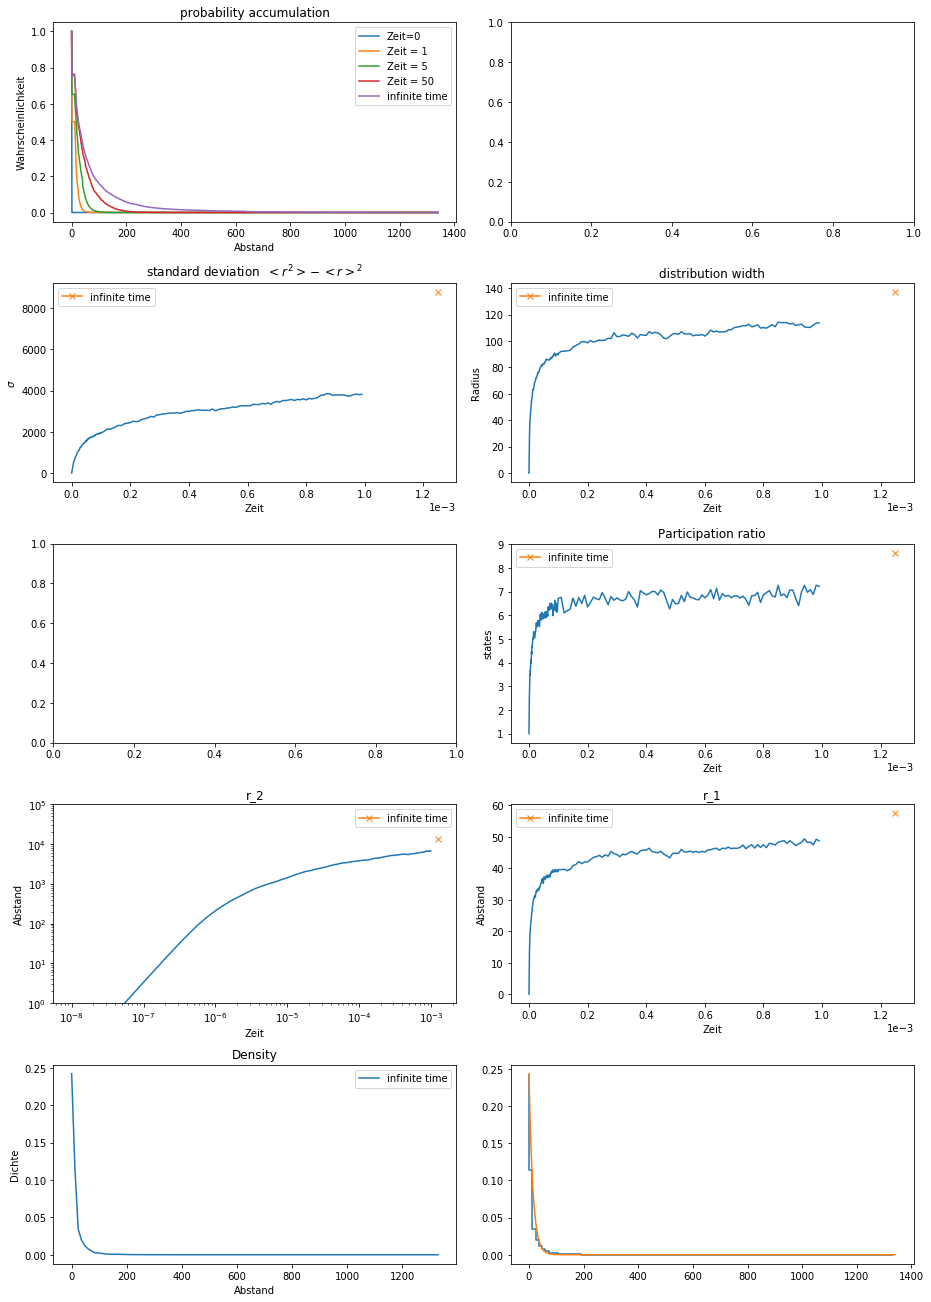

In [30]:
# plots ---------------------------------------------------------------------------------------------
x=np.arange(r_anfang,r_ende,1)   

fig, axes = plt.subplots(5,2, figsize=(13,18))  # 2 rows, 2 columns
plt.tight_layout()  
plt.subplots_adjust(wspace=0.2)

axes[0,0].set_title("probability accumulation")
axes[0,0].plot(x,n_ursprung[0], label="Zeit=0");
axes[0,0].plot(x,n_ursprung[1], label = "Zeit = 1");
axes[0,0].plot(x,n_ursprung[2], label = "Zeit = 5");
axes[0,0].plot(x,n_ursprung[3], label = "Zeit = 50");
axes[0,0].plot(x,n_ursprung_inf, label="infinite time");
axes[0,0].set_xlabel("Abstand")
axes[0,0].set_ylabel("Wahrscheinlichkeit")
#axes[0,0].set_yscale("log")
axes[0,0].legend();

#axes[0,1].set_title("Ausbreitung")
#axes[0,1].plot(x[:len(n_intervall[0])],n_intervall[0], label="Zeit=0");
#axes[0,1].plot(x[:len(n_intervall[1])],n_intervall[1], label = "Zeit = 1");
#axes[0,1].plot(x[:len(n_intervall[2])],n_intervall[2], label = "Zeit = 5");
#axes[0,1].plot(x[:len(n_intervall[3])],n_intervall[3], label = "Zeit = 50");
#axes[0,1].plot(x[:len(n_intervall_inf)],n_intervall_inf, label="infinite time");
#axes[0,1].set_xlabel("Abstand")
#axes[0,1].set_ylabel("Wahrscheinlichkeit")
#axes[0,1].set_yscale("log")
#axes[0,1].set_xlim(-20,radius+20)
#axes[0,1].legend();


axes[1,0].ticklabel_format(axis="x", style="scientific",scilimits=(4,-3))
axes[1,0].set_title("standard deviation  "+ r"$<r^2>-<r>^2$")
axes[1,0].plot(times, deviation)
#axes[1,0].set_yscale("log")
#axes[1,0].set_xscale("log")
axes[1,0].plot(t_end+t_end*0.25,deviation_inf, marker ="x", label="infinite time")
#axes[1,0].plot(t[0:20],quad_func(t[0:20],10**14), label=r"$t^2$");
#axes[1,0].plot(t[25:250],lin_func(t[25:250],10**7),label=r"$t$");
axes[1,0].set_xlabel("Zeit")
axes[1,0].set_ylabel(r"$\sigma$")
axes[1,0].legend();

axes[1,1].set_title("distribution width")
axes[1,1].ticklabel_format(axis="x", style="scientific",scilimits=(4,-3))
axes[1,1].plot(times,distribution_width);
axes[1,1].plot(t_end+t_end*0.25,distribution_width_inf, marker ="x", label="infinite time")
axes[1,1].set_xlabel("Zeit")
axes[1,1].set_ylabel("Radius");
axes[1,1].legend();
fig.tight_layout()


#axes[2,1].set_yscale("log")
axes[2,1].set_title("Participation ratio")
axes[2,1].ticklabel_format(axis="x", style="scientific",scilimits=(4,-3))
axes[2,1].plot(times,ipr);
axes[2,1].plot(t_end+t_end*0.25,ipr_inf, marker ="x", label="infinite time")
axes[2,1].set_xlabel("Zeit")
axes[2,1].set_ylabel("states");
axes[2,1].legend();

axes[3,0].set_xscale("log")
axes[3,0].set_yscale("log")
axes[3,0].set_title("r_2")
axes[3,0].set_ylim(1,10**5)
#axes[3,0].ticklabel_format(axis="x", style="scientific",scilimits=(4,-3))
axes[3,0].plot(times,r_2);
axes[3,0].plot(t_end+t_end*0.25,r_2_inf, marker ="x", label="infinite time")
axes[3,0].set_xlabel("Zeit")
axes[3,0].set_ylabel("Abstand");
axes[3,0].legend();

#axes[3,1].set_xscale("log")
#axes[3,1].set_yscale("log")
axes[3,1].set_title("r_1")
axes[3,1].ticklabel_format(axis="x", style="scientific",scilimits=(4,-3))
axes[3,1].plot(times,r_1);
axes[3,1].plot(t_end+t_end*0.25,r_1_inf, marker ="x", label="infinite time")
axes[3,1].set_xlabel("Zeit")
axes[3,1].set_ylabel("Abstand");
axes[3,1].legend();


axes[4,0].set_title("Density")
#axes[4,0].ticklabel_format(axis="x", style="scientific",scilimits=(4,-3))
s=radius/len(density_inf)
x=np.arange(0,radius,s)
axes[4,0].plot(x,density_inf, label="infinite time");

axes[4,0].set_xlabel("Abstand")
axes[4,0].set_ylabel("Dichte");
axes[4,0].legend();


popt,pcov = curve_fit(e_func,x,density_inf,p0=[10,0.1])

axes[4,1].step(x[:len(density_inf)],density_inf)
x=np.arange(0,radius)
axes[4,1].plot(x,e_func(x,*popt))
print(popt[1],popt[0])

#fig.savefig("files/over_time/figures/transport_"+str(number_atoms)+"_"+str(int(radius))+".png")

0.005168296268678483 31.059838407014986


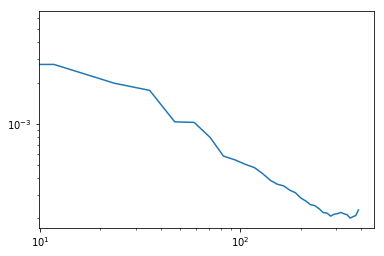

In [50]:
%matplotlib inline
#plt.ticklabel_format(axis="x", style="scientific",scilimits=(4,-3))
s=radius/len(density_inf)
x=np.arange(0,radius,s)

plt.yscale("log")
plt.xscale("log")
plt.plot(x,density_inf, label="infinite time");


popt,pcov = curve_fit(e_func,x,density_inf,p0=[10,0.1])

#plt.step(x,density_inf)
x=np.arange(0,radius)
#plt.plot(x,e_func(x,*popt))
print(popt[1],popt[0])